In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

print(__version__) # requires version >= 1.9.0

4.8.1


In [3]:
import cufflinks as cf
init_notebook_mode(connected=True)
# For offline use
cf.go_offline()
from pandas_datareader import data, wb
import datetime

In [4]:
pd.set_option('display.max_columns', None)

In [5]:
data=pd.read_csv('//home/jorgemsr123/Desktop/Data_sets/colombia-house-prediction/Sales_prediction_Colombia.csv')

In [12]:
data.head(5)

,Unnamed: 0,antiguedad_original,area,areabalcon,areaconstruida,areaterraza,balcon,banos,banoservicio,conjuntocerrado,cuarto_de_escoltas,cuartodeservicio,depositoocuartoutil,depositos,estrato,estudioobiblioteca,garajecubierto,garajes,gimnasio,habitaciones,halldealcobasoestar,instalaciondegas,jacuzzi,jardin,latitud,longitud,numeroascensores,parqueaderovisitantes,piscina,plantaelectrica,porteriaovigilancia,remodelado,saloncomunal,sauna_yo_turco,terraza,tiempodeconstruido,tipodegaraje,valor,vigilancia,vista,zona_de_bbq,zonadelavanderia,zonaninos,zonasverdes
0,0,Entre 5 y 10 años,145.0,10.0,145.0,10.0,Terraza,3.0,NaN,NaN,NaN,NaN,1,1,6.0,Si,Si,2.0,NaN,3.0,NaN,Natural,NaN,NaN,4.697760,-74.039581,2.0,NaN,NaN,NaN,24hrs,No,NaN,NaN,Terraza,Entre 5 y 10 años,Independiente,9.000000e+08,24hrs,Exterior,NaN,Si,NaN,NaN
1,1,Entre 0 y 5 años,114.0,NaN,114.0,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,4.734622,-74.046137,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,Entre 0 y 5 años,NaN,5.481475e+08,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Entre 5 y 10 años,170.0,30.0,170.0,30.0,Terraza,4.0,NaN,Si,NaN,NaN,1,1,6.0,Si,Si,3.0,Si,2.0,Si,Natural,NaN,NaN,4.653789,-74.053574,1.0,NaN,NaN,NaN,NaN,No,Si,NaN,Terraza,Entre 5 y 10 años,Propio,1.500000e+09,NaN,Exterior,NaN,Si,NaN,Si
3,3,Entre 0 y 5 años,61.0,NaN,61.0,NaN,Balcón,1.0,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,Si,1.0,NaN,1.0,Si,Natural,NaN,NaN,4.679389,-74.055616,1.0,NaN,NaN,NaN,24hrs,No,Si,NaN,Balcón,Entre 0 y 5 años,Independiente,4.950000e+08,24hrs,Exterior,NaN,NaN,NaN,NaN
4,4,Más de 20 años,120.5,NaN,120.5,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Si,NaN,2.0,NaN,2.0,NaN,NaN,NaN,NaN,4.705831,-74.041790,NaN,NaN,NaN,NaN,Si,No,NaN,NaN,NaN,Más de 20 años,Servidumbre,8.500000e+08,Si,NaN,NaN,Si,NaN,NaN


In [8]:
data[['valorventa','valor']].corr()

,valorventa,valor
valorventa,1.0,1.0
valor,1.0,1.0


In [8]:
a=data['valorventa']==data['valor']

In [11]:
a.nunique()

1

In [9]:
data.drop('valorventa', axis=1 , inplace=True)

In [5]:
pd.set_option('display.max_columns', None)

In [10]:
values= {'areabalcon':0,'areaconstruida':0,'areaterraza':0,'balcon':'Ninguno','banoservicio':'No', 'conjuntocerrado':'No','cuarto_de_escoltas':'No','cuartodeservicio':'No','depositoocuartoutil':0,'depositos':0,'estudioobiblioteca':'No','garajecubierto':'No','garajes':0,'gimnasio':'No','halldealcobasoestar':'No','instalaciondegas':'No','jacuzzi':'No','jardin':'No','numeroascensores':0,'parqueaderovisitantes':'No','piscina':'No','plantaelectrica':'No','porteriaovigilancia':'No','saloncomunal':'No','sauna_yo_turco':'No','terraza':'Ninguno','tipodegaraje':'Ninguno','vigilancia':'No','vista':'Ninguno','zona_de_bbq':'No','zonadelavanderia':'No','zonaninos':'No','zonasverdes':'No'}

In [11]:
data_full=data.fillna(value=values)
#Null data is gone, I am missing estrato to try to forecast de value, I do not have dummi values yet
# I use the dictionary values to get rid off the null values

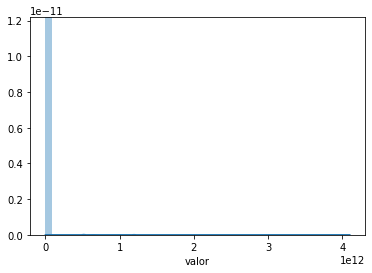

In [13]:
sns.distplot(data_full['valor'])

In [15]:
data_full.head(5)

,Unnamed: 0,antiguedad_original,area,areabalcon,areaconstruida,areaterraza,balcon,banos,banoservicio,conjuntocerrado,cuarto_de_escoltas,cuartodeservicio,depositoocuartoutil,depositos,estrato,estudioobiblioteca,garajecubierto,garajes,gimnasio,habitaciones,halldealcobasoestar,instalaciondegas,jacuzzi,jardin,latitud,longitud,numeroascensores,parqueaderovisitantes,piscina,plantaelectrica,porteriaovigilancia,remodelado,saloncomunal,sauna_yo_turco,terraza,tiempodeconstruido,tipodegaraje,valor,vigilancia,vista,zona_de_bbq,zonadelavanderia,zonaninos,zonasverdes
0,0,Entre 5 y 10 años,145.0,10.0,145.0,10.0,Terraza,3.0,No,No,No,No,1,1,6.0,Si,Si,2.0,No,3.0,No,Natural,No,No,4.697760,-74.039581,2.0,No,No,No,24hrs,No,No,No,Terraza,Entre 5 y 10 años,Independiente,9.000000e+08,24hrs,Exterior,No,Si,No,No
1,1,Entre 0 y 5 años,114.0,0.0,114.0,0.0,Ninguno,3.0,No,No,No,No,0,0,4.0,No,No,0.0,No,3.0,No,No,No,No,4.734622,-74.046137,0.0,No,No,No,No,No,No,No,Ninguno,Entre 0 y 5 años,Ninguno,5.481475e+08,No,Ninguno,No,No,No,No
2,2,Entre 5 y 10 años,170.0,30.0,170.0,30.0,Terraza,4.0,No,Si,No,No,1,1,6.0,Si,Si,3.0,Si,2.0,Si,Natural,No,No,4.653789,-74.053574,1.0,No,No,No,No,No,Si,No,Terraza,Entre 5 y 10 años,Propio,1.500000e+09,No,Exterior,No,Si,No,Si
3,3,Entre 0 y 5 años,61.0,0.0,61.0,0.0,Balcón,1.0,No,No,No,No,0,0,6.0,No,Si,1.0,No,1.0,Si,Natural,No,No,4.679389,-74.055616,1.0,No,No,No,24hrs,No,Si,No,Balcón,Entre 0 y 5 años,Independiente,4.950000e+08,24hrs,Exterior,No,No,No,No
4,4,Más de 20 años,120.5,0.0,120.5,0.0,Ninguno,3.0,No,No,No,No,0,0,NaN,Si,No,2.0,No,2.0,No,No,No,No,4.705831,-74.041790,0.0,No,No,No,Si,No,No,No,Ninguno,Más de 20 años,Servidumbre,8.500000e+08,Si,Ninguno,No,Si,No,No


In [16]:
data_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145552 entries, 0 to 145551
Data columns (total 44 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             145552 non-null  int64  
 1   antiguedad_original    145552 non-null  object 
 2   area                   145528 non-null  float64
 3   areabalcon             145552 non-null  float64
 4   areaconstruida         145552 non-null  float64
 5   areaterraza            145552 non-null  float64
 6   balcon                 145552 non-null  object 
 7   banos                  145016 non-null  float64
 8   banoservicio           145552 non-null  object 
 9   conjuntocerrado        145552 non-null  object 
 10  cuarto_de_escoltas     145552 non-null  object 
 11  cuartodeservicio       145552 non-null  object 
 12  depositoocuartoutil    145552 non-null  object 
 13  depositos              145552 non-null  object 
 14  estrato                138885 non-nu

In [17]:
df_full_2=data_full.dropna(subset=['area','banos','habitaciones'], axis=0)
# The goal was to take away all most null values, I just kept estrato

In [18]:
df_full_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144986 entries, 0 to 145551
Data columns (total 44 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             144986 non-null  int64  
 1   antiguedad_original    144986 non-null  object 
 2   area                   144986 non-null  float64
 3   areabalcon             144986 non-null  float64
 4   areaconstruida         144986 non-null  float64
 5   areaterraza            144986 non-null  float64
 6   balcon                 144986 non-null  object 
 7   banos                  144986 non-null  float64
 8   banoservicio           144986 non-null  object 
 9   conjuntocerrado        144986 non-null  object 
 10  cuarto_de_escoltas     144986 non-null  object 
 11  cuartodeservicio       144986 non-null  object 
 12  depositoocuartoutil    144986 non-null  object 
 13  depositos              144986 non-null  object 
 14  estrato                138348 non-nu

In [19]:
df_full_2.sort_values(by='valor', ascending=False).head(5)

,Unnamed: 0,antiguedad_original,area,areabalcon,areaconstruida,areaterraza,balcon,banos,banoservicio,conjuntocerrado,cuarto_de_escoltas,cuartodeservicio,depositoocuartoutil,depositos,estrato,estudioobiblioteca,garajecubierto,garajes,gimnasio,habitaciones,halldealcobasoestar,instalaciondegas,jacuzzi,jardin,latitud,longitud,numeroascensores,parqueaderovisitantes,piscina,plantaelectrica,porteriaovigilancia,remodelado,saloncomunal,sauna_yo_turco,terraza,tiempodeconstruido,tipodegaraje,valor,vigilancia,vista,zona_de_bbq,zonadelavanderia,zonaninos,zonasverdes
134504,134504,Entre 5 y 10 años,346.0,0.0,346.0,0.0,Terraza,5.0,No,Si,Si,Si,0,0,6.0,Si,Si,0.0,Si,3.0,Si,Natural,No,No,4.662450,-74.047499,1.0,No,Si,No,24hrs,No,Si,No,Terraza,Entre 5 y 10 años,Ninguno,4.100000e+12,24hrs,Exterior,No,No,Si,Si
103709,103709,Más de 20 años,380.0,90.0,380.0,90.0,Terraza,4.0,No,Si,No,No,1,1,6.0,Si,Si,3.0,Si,4.0,No,Natural,No,No,4.716730,-74.028244,1.0,No,No,No,No,No,No,Si,Terraza,Más de 20 años,Independiente,2.000000e+12,No,Exterior,No,Si,Si,Si
109528,109528,Entre 10 y 20 años,210.0,30.0,210.0,30.0,Terraza,4.0,No,Si,No,Si,1,1,4.0,Si,Si,2.0,Si,3.0,Si,Natural,No,No,4.712333,-74.025696,2.0,No,No,No,No,No,Si,Si,Terraza,Entre 10 y 20 años,Propio,1.800000e+12,No,Exterior,Si,Si,Si,Si
126130,126130,Entre 5 y 10 años,430.0,0.0,430.0,0.0,Ninguno,5.0,No,Si,No,No,1,1,6.0,Si,Si,3.0,Si,5.0,Si,Natural,Si,No,4.721000,-74.025928,1.0,No,No,No,24hrs,No,Si,No,Ninguno,Entre 5 y 10 años,Propio,1.800000e+12,24hrs,Exterior,Si,Si,Si,Si
107607,107607,Entre 10 y 20 años,246.0,4.0,246.0,4.0,Terraza,5.0,No,Si,No,Si,1,1,5.0,Si,Si,2.0,Si,3.0,Si,No,No,No,4.707257,-74.028870,0.0,No,No,No,24hrs,No,Si,Si,Terraza,Entre 10 y 20 años,Independiente,1.750000e+12,24hrs,Exterior,Si,Si,Si,Si


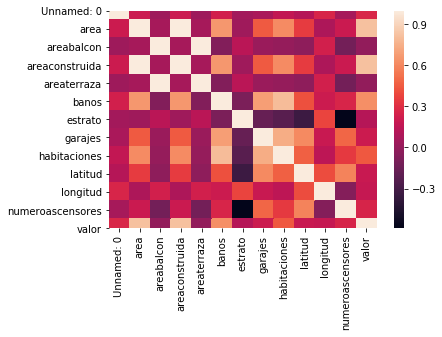

In [19]:
sns.heatmap(df_full_2.sort_values(by='valor', ascending=False).head(50).corr())

In [19]:
data['area'].isnull().unique()

array([False,  True])

In [13]:
data_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145552 entries, 0 to 145551
Data columns (total 44 columns):
Unnamed: 0               145552 non-null int64
antiguedad_original      145552 non-null object
area                     145528 non-null float64
areabalcon               145552 non-null float64
areaconstruida           145552 non-null float64
areaterraza              145552 non-null float64
balcon                   145552 non-null object
banos                    145016 non-null float64
banoservicio             145552 non-null object
conjuntocerrado          145552 non-null object
cuarto_de_escoltas       145552 non-null object
cuartodeservicio         145552 non-null object
depositoocuartoutil      145552 non-null object
depositos                145552 non-null object
estrato                  138885 non-null float64
estudioobiblioteca       145552 non-null object
garajecubierto           145552 non-null object
garajes                  145552 non-null float64
gimnasio           

In [20]:
#gas and porteriaovigilancia have different values than yes or no

In [30]:
df_full_2['porteriaovigilancia'].unique()

array(['Si', 'No'], dtype=object)

In [27]:
porteria=df_full_2['porteriaovigilancia'].apply(lambda x: 'Si' if x!='No' else 'No')

In [29]:
df_full_2['porteriaovigilancia']=porteria

In [35]:
df_full_2['instalaciondegas'].unique()

array(['Si', 'No'], dtype=object)

In [33]:
gas=df_full_2['instalaciondegas'].apply(lambda x: 'No' if (x=='No' or x=='Ninguno') else 'Si')

In [34]:
df_full_2['instalaciondegas']=gas

In [36]:
df_full_2.to_csv("//home/jorgemsr123/shared/Housing Colombia/housing_information_clean_lacking_estrato")

In [21]:
df_full_2[['estrato','valor','area','banos']].corr()

,estrato,valor,area,banos
estrato,1.000000,0.023295,0.012919,0.499258
valor,0.023295,1.000000,0.001009,0.027709
area,0.012919,0.001009,1.000000,0.024478
banos,0.499258,0.027709,0.024478,1.000000


In [33]:
data[['estrato','valor','area','banos']].corr()

,estrato,valor,area,banos
estrato,1.000000,0.027941,0.013047,0.499191
valor,0.027941,1.000000,0.001224,0.027711
area,0.013047,0.001224,1.000000,0.024480
banos,0.499191,0.027711,0.024480,1.000000


In [34]:
data.corr()

,Unnamed: 0,area,areabalcon,areaconstruida,areaterraza,banos,estrato,garajes,habitaciones,latitud,longitud,numeroascensores,valor
Unnamed: 0,1.000000,0.001448,0.000678,0.001448,0.000678,0.001189,0.003392,-0.002928,-0.000611,0.002294,0.006089,-0.000760,0.007114
area,0.001448,1.000000,-0.001188,1.000000,-0.001188,0.024480,0.013047,0.040061,0.018882,-0.006246,-0.000030,-0.002351,0.001224
areabalcon,0.000678,-0.001188,1.000000,-0.001188,1.000000,-0.005811,-0.049156,-0.015220,-0.008613,-0.058044,-0.006695,-0.013463,-0.000816
areaconstruida,0.001448,1.000000,-0.001188,1.000000,-0.001188,0.024480,0.013047,0.040061,0.018882,-0.006246,-0.000030,-0.002351,0.001224
areaterraza,0.000678,-0.001188,1.000000,-0.001188,1.000000,-0.005811,-0.049156,-0.015220,-0.008613,-0.058044,-0.006695,-0.013463,-0.000816
banos,0.001189,0.024480,-0.005811,0.024480,-0.005811,1.000000,0.499191,0.639138,0.475339,0.049016,0.293722,0.034348,0.027711
estrato,0.003392,0.013047,-0.049156,0.013047,-0.049156,0.499191,1.000000,0.522280,-0.005014,0.011307,0.545893,-0.064639,0.027941
garajes,-0.002928,0.040061,-0.015220,0.040061,-0.015220,0.639138,0.522280,1.000000,0.296917,-0.040727,0.269914,0.021488,0.019328
habitaciones,-0.000611,0.018882,-0.008613,0.018882,-0.008613,0.475339,-0.005014,0.296917,1.000000,0.083144,-0.087650,-0.001396,0.001151
latitud,0.002294,-0.006246,-0.058044,-0.006246,-0.058044,0.049016,0.011307,-0.040727,0.083144,1.000000,0.426119,-0.022188,-0.002446


In [22]:
df_full_2.corr()

,Unnamed: 0,area,areabalcon,areaconstruida,areaterraza,banos,estrato,garajes,habitaciones,latitud,longitud,numeroascensores,valor
Unnamed: 0,1.000000,0.001429,0.000324,0.001429,0.000324,0.001217,0.003207,-0.001180,-0.000347,0.002642,0.005989,-0.002774,0.006348
area,0.001429,1.000000,-0.000068,1.000000,-0.000068,0.024478,0.012919,0.020815,0.018991,-0.006185,-0.000104,0.001474,0.001009
areabalcon,0.000324,-0.000068,1.000000,-0.000068,1.000000,0.004686,-0.010643,0.004370,-0.003810,-0.017415,0.003964,-0.006570,0.000313
areaconstruida,0.001429,1.000000,-0.000068,1.000000,-0.000068,0.024478,0.012919,0.020815,0.018991,-0.006185,-0.000104,0.001474,0.001009
areaterraza,0.000324,-0.000068,1.000000,-0.000068,1.000000,0.004686,-0.010643,0.004370,-0.003810,-0.017415,0.003964,-0.006570,0.000313
banos,0.001217,0.024478,0.004686,0.024478,0.004686,1.000000,0.499258,0.639043,0.475347,0.049057,0.293766,0.164590,0.027709
estrato,0.003207,0.012919,-0.010643,0.012919,-0.010643,0.499258,1.000000,0.603149,-0.004992,0.012477,0.546266,0.180474,0.023295
garajes,-0.001180,0.020815,0.004370,0.020815,0.004370,0.639043,0.603149,1.000000,0.246047,0.068260,0.394486,0.216398,0.015634
habitaciones,-0.000347,0.018991,-0.003810,0.018991,-0.003810,0.475347,-0.004992,0.246047,1.000000,0.083360,-0.088228,-0.022096,0.015262
latitud,0.002642,-0.006185,-0.017415,-0.006185,-0.017415,0.049057,0.012477,0.068260,0.083360,1.000000,0.426660,0.031978,-0.007139


In [7]:
data.drop('valorventa', axis=1 , inplace=True)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145552 entries, 0 to 145551
Data columns (total 44 columns):
Unnamed: 0               145552 non-null int64
antiguedad_original      145552 non-null object
area                     145528 non-null float64
areabalcon               24357 non-null float64
areaconstruida           145528 non-null float64
areaterraza              24357 non-null float64
balcon                   78145 non-null object
banos                    145016 non-null float64
banoservicio             1116 non-null object
conjuntocerrado          67528 non-null object
cuarto_de_escoltas       3734 non-null object
cuartodeservicio         28343 non-null object
depositoocuartoutil      57456 non-null object
depositos                41538 non-null object
estrato                  138885 non-null float64
estudioobiblioteca       59568 non-null object
garajecubierto           71446 non-null object
garajes                  131688 non-null float64
gimnasio                 40744 n

In [28]:
trial_estratos=data[['estrato','valor']]

In [29]:
trial_estratos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145552 entries, 0 to 145551
Data columns (total 2 columns):
estrato    138885 non-null float64
valor      145552 non-null float64
dtypes: float64(2)
memory usage: 2.2 MB


In [30]:
x=trial_estratos.dropna(axis=0)

In [31]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 138885 entries, 0 to 145551
Data columns (total 2 columns):
estrato    138885 non-null float64
valor      138885 non-null float64
dtypes: float64(2)
memory usage: 3.2 MB


In [32]:
x.corr()

,estrato,valor
estrato,1.000000,0.027941
valor,0.027941,1.000000
